In [239]:
# En esta celda se puede probar la funcion de analisis de una imagen

from lib.image import image_data
from lib.analysis import dyssynchrony_analysis
import cv2

# Path completo donde esta la imagen (incluyendo nombre y extencion)
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/seleccion/030321/vk/'
photo_name = 'V5c000'
photo = photo_name + '.tif'
# Ancho de la feta a analisar (es un parametro opcional)
slice_width = 5

# Distancia minima en pixeles entre picos
min_dist_between_maxs = 50
# Calibracion del tiempo de cada pixel
calibration = 1

image = cv2.imread(path + photo_name + '.tif')
# Select ROI
fromCenter = False
showCrosshair = False
seleted_parameters = cv2.selectROI(image, fromCenter, showCrosshair)

# Crop image
x_start = int(seleted_parameters[1])
x_end = x_start + int(seleted_parameters[3])
y_start = int(seleted_parameters[0]) 
y_end = y_start + int(seleted_parameters[2])

cv2.destroyAllWindows()
image = image_data.get_image_data(image)
image = image_data.crop_vertical(image, x_start, x_end)
image = image_data.crop_horizontal(image, y_start, y_end)

results = dyssynchrony_analysis.analyze_image(image, min_dist_between_maxs, calibration, slice_width=slice_width)

/home/leandro/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
#Imports
import json
import numpy as np
import pandas as pd

In [3]:
#encodes a dictionary into a jason
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


def jasonGenerator(path,results,photo_name):
    """ Generates a .jason file in the path given folder from the a dictionary """
    with open(path + '/analysis_result_' + photo_name + '.json',"w") as miarch:
        miarch.write(json.dumps(results, cls=NumpyEncoder))

In [4]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [5]:
def slicesParser_max_peaksI(dictres):
#extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x) for x in range(0,len(allSlices[0]['max_peaks_intensities']))]    
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    for i in range(0,len(allSlices)):
        df_sum.loc[i] = allSlices[i]['max_peaks_intensities'][0:] 
    return df_sum

In [6]:
def slicesParser_amplitudes(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['amplitudes']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['amplitudes']
    return df_sum

In [240]:
jasonGenerator(path,results,photo_name)

In [241]:
dic = jasonReader(path + 'analysis_result_' + photo_name + '.json')
slicesParser_amplitudes(dic)

,transient1,transient2,transient3,transient4,transient5,transient6,transient7
1,0.000000,0.000000,0.083333,0.166667,0.250000,0.000000,0.000000
2,0.083333,0.083333,0.083333,0.166667,0.333333,0.000000,0.000000
3,0.083333,0.083333,0.083333,0.166667,0.250000,0.000000,0.083333
4,0.083333,0.083333,0.083333,0.083333,0.250000,0.000000,0.083333
5,0.083333,0.083333,0.083333,0.083333,0.250000,0.000000,0.000000
6,0.083333,0.083333,0.083333,0.083333,0.250000,0.076923,0.000000
7,0.000000,0.000000,0.083333,0.083333,0.250000,0.076923,0.000000
8,0.000000,0.083333,0.083333,0.083333,0.250000,0.076923,0.000000
9,0.000000,0.083333,0.083333,0.166667,0.153846,0.000000,0.000000
10,0.083333,0.083333,0.083333,0.166667,0.153846,0.000000,0.000000


In [ ]:
def discordance_index(path):
    DIs = pd.DataFrame()
    for j in range (1, len(slicesParser_amplitudes(path).columns)):
        rel_diff = []
        for i in range (0, len (slicesParser_amplitudes(path))):
            T1 = list(slicesParser_amplitudes(path)['transient'+str(j)])[i]
            T2 = list(slicesParser_amplitudes(path)['transient'+str(j+1)])[i]
            rel_diff.append((T1-T2)/max(T1,T2))
        DIs[j] = rel_diff
    return DIs

In [ ]:
for j in range(0,len(array)):
    max_peaks = _max_peaks_positions(results,j)
    min_peaks = _min_peaks_positions(results, results['image']['max_peaks_positions'], j)

In [ ]:
results['image']['max_peaks_positions']

In [44]:
AR_list = []
for i in range(1,4):
    df = pd.read_csv('/home/leandro/Escritorio/DI_table' + str(i) + '.csv',sep='\t',index_col='Unnamed: 0')
    df = df.stack().tolist()
    AR_list.extend(df)

(array([17.,  2., 14.,  9.,  2.,  4.,  1.,  3.,  2.,  2.]),
 array([1.22722029e-03, 2.15912098e-01, 4.30596975e-01, 6.45281853e-01,
        8.59966731e-01, 1.07465161e+00, 1.28933649e+00, 1.50402136e+00,
        1.71870624e+00, 1.93339112e+00, 2.14807600e+00]),
 <BarContainer object of 10 artists>)

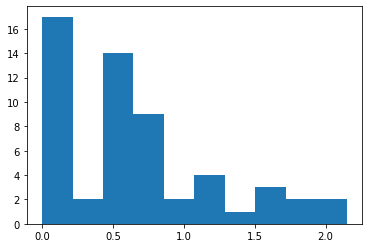

In [45]:
plt.hist(AR_list)